No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


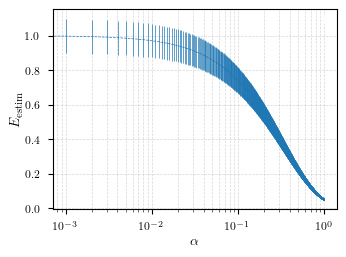

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


IMG_DIRECTORY = "./Assets/"


def save_plot(fig, name, formats=["pdf","jpg"], date=True):
    for f in formats:
        fig.savefig(
            os.path.join(IMG_DIRECTORY, "{}".format(name) + "." + f),
            format=f,
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


save = True
width = 1.25 * 458.63788

plt.style.use("./latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)

multiplier = 0.9
second_multiplier = 0.7

fig, axs = plt.subplots(
    nrows=1,
    ncols=1,
    sharex=True,
    figsize=(multiplier * tuple_size[0], 0.75 * multiplier * tuple_size[0]),
    gridspec_kw={"hspace": 0},
)


fig.subplots_adjust(left=0.16)
fig.subplots_adjust(bottom=0.16)
fig.subplots_adjust(top=0.97)
fig.subplots_adjust(right=0.97)

x = np.linspace(0.0, 1.0, 1000)
y = np.exp(-3 * x)
yerr = 0.1 * y

axs.errorbar(
    x,
    y,
    yerr=yerr,
    marker=".",
    markersize=0.5,
    linewidth=0.5,
    linestyle="--",
)

axs.set_xscale("log")
axs.set_ylabel(r"$E_{\mathrm{estim}}$", labelpad=2.0)
axs.set_xlabel(r"$\alpha$", labelpad=2.0)
axs.grid(which="both", axis="both", alpha=0.5)
axs.legend()

if save:
    save_plot(
        fig,
        "alpha_sweep",
    )

plt.show()

# If one needs a bit more space one can put a multiplier in the size but not more than 1.7 I should say